# Principal Component Analysis (PCA)


**What is Principal Component Analysis (PCA)?**

Principal Component Analysis (PCA) is a technique used to **reduce the dimensionality of a dataset** while retaining most of the information in the data. It does this by transforming a set of correlated variables into a set of uncorrelated variables called principal components.

The **first principal component explains the most variance in the data**, **the second principal component explains the second most variance**, and so on.

PCA is useful for:

- **Data Visualization**: By reducing the dimensionality of the data, it is easier to visualize and understand the relationships between variables.
- **Feature Selection**: By selecting the most important principal components, we can select the most important features in the data.
- **Noise Reduction**: By retaining only the most important principal components, we can reduce the noise in the data.

Important terms:

- **Principal Components**: The new variables created by PCA, which are uncorrelated and explain the variance in the data.
- **Dimensionality Reduction**: The process of reducing the number of variables in a dataset while retaining most of the information in the data.


<img src="https://devopedia.org/images/article/139/4543.1548137789.jpg">

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import PCA from sklearn
from sklearn.decomposition import PCA

In [24]:
# read breast cancer dataset from sklear datasets
from sklearn.datasets import load_breast_cancer

# load dataset
data = load_breast_cancer(as_frame=True)

df =data.frame


In [25]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [26]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [30]:
df.shape

(569, 31)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
# define X and y
X = df.drop('target', axis=1)
y = df['target']

In [33]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# first let's tray a simple logictic regression model with 30 X features and see the results

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
# predict and see the metrics
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [38]:
# now lets implement all predictions with PCS with two principal components

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [44]:
X_train_pca[:10]

array([[ 4.24490333,  9.13142795],
       [ 9.05375518,  0.47530955],
       [-2.27537401,  3.27847097],
       [-2.51045303,  0.74374264],
       [-2.30284792,  2.66515505],
       [ 4.13994739,  2.91476361],
       [ 2.99560854,  4.20447521],
       [-3.2114946 , -0.37315352],
       [-2.37592825,  0.03337879],
       [ 3.38983726, -2.36510231]])

In [43]:
X_test_pca[0:10]

array([[-0.73876965,  0.64390571],
       [ 2.68151063, -4.41052393],
       [ 1.47649913, -1.07657525],
       [-0.87827791,  2.44052157],
       [-1.64043261,  2.37170712],
       [10.41582596,  1.57232789],
       [ 7.22413641, -3.70150702],
       [ 1.7094618 , -1.55324285],
       [ 1.22857887,  2.46080548],
       [-3.15942918, -2.00743045]])

In [41]:
X_train_pca.shape, X_test_pca.shape

((455, 2), (114, 2))

In [42]:
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9912280701754386
Confusion Matrix:
 [[42  1]
 [ 0 71]]


In [ ]:
# WHAT HAPPENED!
# as you see we can improve the accuracy by using 2 principal components

# and also we can see that we can reduce the number of features from 30 to 2

# so we can say that we can reduce the number of features and improve the accuracy

# also we can visualize the data using 2 principal components

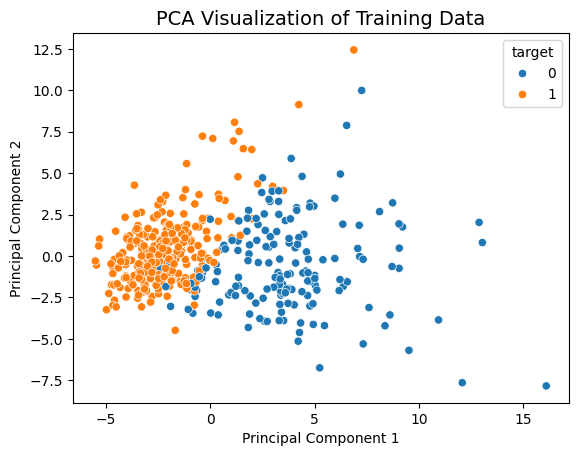

In [48]:
# visualize the data using 2 principal components with seaborn scatter plot

import seaborn as sns

sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train)
plt.title("PCA Visualization of Training Data", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

